# Enhancement-mode common source mosfet amplifier
This paper has been created through collaboration with:

Amir Parsa Hosseini Kakhk

Contact address: seyedamirparsa.hosseinikakhk@mail.um.ac.ir



## MOSFETs in more detail 

### N-channel eMOSFET I-V Characteristics

![N-channel eMOSFET I-V Characteristics.png](<./images/N-channel eMOSFET I-V Characteristics.png>)

As you can see the creation of the conducting channel is not triggered instantly by a positive voltage since no drain current is observed when VGS < Vth where Vth stands for “threshold voltage”. This first region is called  the “Cutoff” or “Subthreshold” region. In this mode, the MOSFET acts as an open switch, allowing no output current to be induced.

When the gate voltage is above the threshold value VGS > Vth, the drain current rises drastically. In this region which is called the saturation or “active” region, the current drain satisfies a parabola relation:

$$I_D = k(V_{GS}-V_{th})^2$$


The factor k, known as conduction factor, depends only on physical parameters of the MOSFET : the ratio Width (W)/Length (L) of the conducting channel between the drain and the source, on the electron mobility μ and the value of the capacitance formed by the metal-oxide-semiconductor structure of the gate Cox:

$$k = {\mu C_{ox}W}/{2L}$$


An important parameter can be derived from Equation 1 and Equation 2 which is called the transconductance (gm) of the MOSFET and is expressed in Amps / Volts or Siemens (S).:

$$g_m = \dfrac{dI_D}{dV_{GS}} = ({\mu C_{ox}W}/L)(V_{GS}-V_{th})$$

Before the saturation effect occurs, the MOSFET behaves differently in a region called “Ohmic”, “Triode” or “Linear” region. In this region, the expression of ID is quasi-linear affected by a decreasing parabola when VDS increases:

$$I_D = ({\mu C_{ox}W}/L)(((V_{GS}-V_{th})V_{DS})-V_{DS}^2/2)$$



## A MOSFET amplifier
The biasing circuit consists of a voltage network divider with two parallel resistors R1 and R2. The coupling capacitors C1 and C2 insulate the biasing DC voltage from the AC signal to be amplified. Also the Cs capacitor wich is for bypassing the Rs ressistor. Finally, the output is delivered to a load, modeled by the resistance RL.


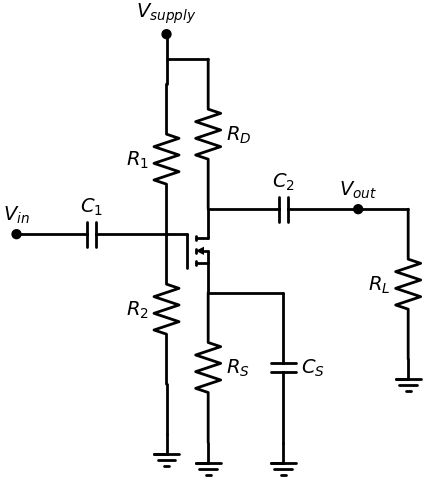

In [2]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    mosfet = elm.NMos(nmos=True, anchor='gate', label='')
    elm.Capacitor().at(mosfet.drain).label('$C_2$')
    elm.Dot().label('$V_{out}$')
    elm.Line().right().length(1)
    elm.Resistor().down().label('$R_L$')
    elm.Ground()
    elm.Resistor().down().at(mosfet.source).label('$R_S$', loc='bottom')
    elm.Ground()
    elm.Capacitor().left().at(mosfet.gate).label('$C_1$')
    elm.Dot().label('$V_{in}$')
    R1 = elm.Resistor().label('$R_1$').up().at(mosfet.gate)
    elm.Line().length(1)
    elm.Dot().label('$V_{supply}$')
    elm.Resistor().down().at(mosfet.gate).label('$R_2$')
    elm.Line().length(1)
    elm.Ground()
    elm.Resistor().up().at(mosfet.drain).label('$R_D$', loc='bottom')
    elm.Line().tox(R1.end)
    elm.Line().right().at(mosfet.source).length(1.5)
    elm.Capacitor().down().label('$C_S$', loc='bot')
    elm.Ground()

**We gonna show how can we calculate the $Z_{in}$, $Z_{out}$, $V_{out}$ and $Av$ of this circuit.**

## DC analysis

The redrawn circuit in DC will be:

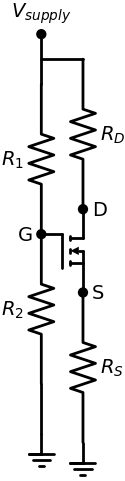

In [3]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    mosfet = elm.NMos(nmos=True, anchor='gate', label='')
    elm.Resistor().down().at(mosfet.source).label('$R_S$', loc='bottom')
    elm.Ground()
    elm.Dot().label('G', loc='left').at(mosfet.gate)
    elm.Dot().label('S', loc='right').at(mosfet.source)
    elm.Dot().label('D', loc='right').at(mosfet.drain) 
    R1 = elm.Resistor().label('$R_1$').up().at(mosfet.gate)
    elm.Line().length(1)
    elm.Dot().label('$V_{supply}$')
    elm.Resistor().down().at(mosfet.gate).label('$R_2$')
    elm.Line().length(1)
    elm.Ground()
    elm.Resistor().up().at(mosfet.drain).label('$R_D$', loc='bottom')
    elm.Line().tox(R1.end)
    

Initially we assume our circuit is in the saturation region.

In the saturation region we have:
$$I_S = I_D = k(V_{GS}-V_{th})^2$$
$$ eq1 $$
$$I_G = 0$$
$$ eq2 $$
Now we start calculating, in this circuit the gate voltage will be:
$$ V_G = V_{supply}(R_2/{(R_1+R_2)}) $$
$$ eq3 $$

Then we use the KVL for the input loop and we get:
$$ -V_G + V_{GS}+R_SI_S = 0$$
$$ eq4 $$


By putting the $I_S$ from eq1 in eq4 we will get:
$$ -V_G + V_{GS}+R_S k(V_{GS}-V_{th})^2= 0$$
$$ eq5 $$

At this point we have $V_G, V_{th}, R_S$ and k so we can calculate the $V_{GS}$ and $I_D$ afterwards. 

The only thing left is calculating $V_{DS}$ which we can do by using the KVL for the output loop:
$$ -V_{supply} + R_DI_D + V_{DS} + R_SI_S = 0 $$
$$eq6$$

So the $V_{DS}$ will be:
$$ V_{DS} = V_{supply} - (R_D+R_S)I_D = 0 $$
$$eq7$$

In the end to check whether or not our assumption was corrcet we should check this two conditions:
$$ V_{GS} \ge V_{th} $$
$$ V_{DS} \ge V_{GS} - V_{th} $$


## AC analysis

The redrawn circuit in AC will be:


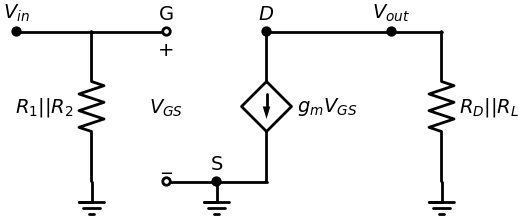

In [4]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing():
    elm.Dot().label('$D$')
    L1 = elm.Line().length(2.5)
    elm.Dot().label('$V_{out}$')
    elm.Line().right().length(1)
    elm.Resistor().down().label('$R_D||R_L$', loc='bot')
    elm.Ground()
    
    elm.SourceControlledI().at(L1.start).down().label('$g_mV_{GS}$', loc='bot')
    elm.Line().left().length(1)
    elm.Dot().label('S')
    elm.Ground()
    elm.Line().left().length(1)
    elm.Dot(open=True).label('_').label('$V_{GS}$', ofst=1.2)
    elm.Gap().up()
    
    elm.Dot(open=True).label('+', loc='bot').label('G', loc='top')
    L2 = elm.Line().left().length(1.5)
    
    elm.Resistor().down().label('$R_1||R_2$')
    elm.Ground()
    elm.Line().left().at(L2.end).length(1.5)
    elm.Dot().label('$V_{in}$')


The input and output impedances are:
$$ Z_{in} = R_1||R_2 = R_1R_2/(R_1+R_2) $$
$$ eq8 $$
$$ Z_{out} = R_D||R_L = R_DR_L/(R_D+R_L) $$
$$ eq9 $$

we can also see that $V_{out}$ is:
$$ V_{out} = -i_D(R_D||R_L) = -g_mV_{gs}(R_D||R_L) $$
$$ eq10 $$

The sign “-” comes from the fact that in analogy with the BJT Common Emitter Amplifier, the MOSFET amplifier inverts the output signal (the phase is shifted of 180 ° or π rad).

And to calculate the voltage gain:

$$ A_v = V_{out}/V_{in} = -g_m(R_D||R_L) $$
$$ eq11 $$


### Analyzing an example using pyspice

Input Voltage Peak-to-Peak: 2.00 V
Output Voltage Peak-to-Peak: 3.85 V
Voltage Gain (Av): 1.92
Input Voltage Max: 1.00 V, Min: -1.00 V
Output Voltage Max: 1.81 V, Min: -2.03 V


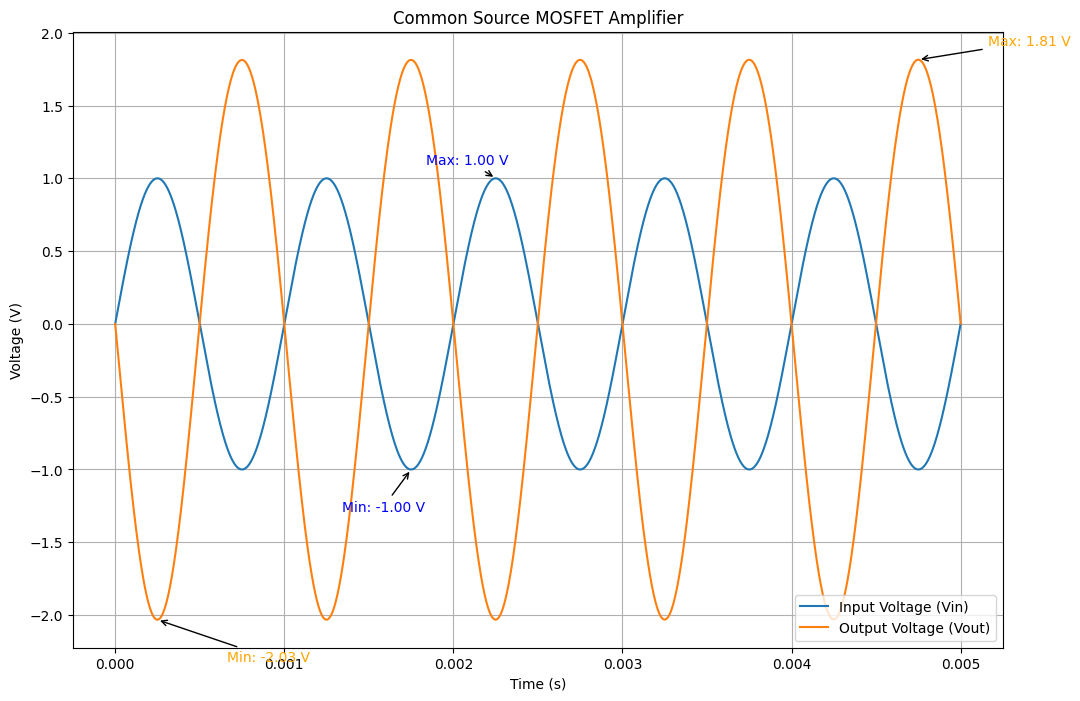

In [11]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Probe.Plot import plot
import matplotlib.pyplot as plt
import numpy as np

# Define the circuit
circuit = Circuit('Common Source MOSFET Amplifier')

circuit.V(1, 'Vdd', circuit.gnd, 15@u_V)  # Supply voltage = 15V
circuit.R(1, 'Vdd', 'Gate', 50@u_kΩ)     # R_1 = 50 kΩ
circuit.R(2, 'Gate', circuit.gnd, 20@u_kΩ)  # R_2 = 20 kΩ
circuit.R(3, 'Vdd', 'Drain', 2@u_kΩ)      # R_D = 2 kΩ
circuit.R(4, 'Source', circuit.gnd, 500@u_Ω)  # R_S = 500 Ω
circuit.R(5, circuit.gnd, 'Output', 10@u_kΩ)  # R_L = 10 kΩ
circuit.C(1, 'Vin', 'Gate', 10@u_uF)      # C_1 = 10 μF
circuit.C(2, 'Drain', 'Output', 10@u_uF)  # C_2 = 10 μF
circuit.SinusoidalVoltageSource(2, 'Vin', circuit.gnd, amplitude=1@u_V, frequency=1@u_kHz)
circuit.M(1, 'Drain', 'Gate', 'Source', circuit.gnd, model='NMOS')
circuit.model('NMOS', 'NMOS', kp=2e-3, vto=2, lambda_=0.01)

# Perform simulation
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1@u_us, end_time=5@u_ms)

# Extract input and output voltages as arrays
input_voltage = np.array([float(v) for v in analysis['Vin']])
output_voltage = np.array([float(v) for v in analysis['Output']])

# Calculate the peak-to-peak voltage for input and output
v_in_peak_to_peak = np.max(input_voltage) - np.min(input_voltage)
v_out_peak_to_peak = np.max(output_voltage) - np.min(output_voltage)

# Calculate voltage gain (Av = Vout_peak_to_peak / Vin_peak_to_peak)
voltage_gain = v_out_peak_to_peak / v_in_peak_to_peak

# Calculate maximum and minimum voltages
v_in_max = np.max(input_voltage)
v_in_min = np.min(input_voltage)
v_out_max = np.max(output_voltage)
v_out_min = np.min(output_voltage)

# Print results
print(f"Input Voltage Peak-to-Peak: {v_in_peak_to_peak:.2f} V")
print(f"Output Voltage Peak-to-Peak: {v_out_peak_to_peak:.2f} V")
print(f"Voltage Gain (Av): {voltage_gain:.2f}")
print(f"Input Voltage Max: {v_in_max:.2f} V, Min: {v_in_min:.2f} V")
print(f"Output Voltage Max: {v_out_max:.2f} V, Min: {v_out_min:.2f} V")

# Plot the waveforms
plt.figure(figsize=(12, 8))
plt.plot(analysis.time, analysis['Vin'], label='Input Voltage (Vin)')
plt.plot(analysis.time, analysis['Output'], label='Output Voltage (Vout)')

# Annotate maximum and minimum points on the graph
plt.annotate(f'Max: {v_in_max:.2f} V', xy=(analysis.time[np.argmax(input_voltage)], v_in_max),
             xytext=(-50, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->'), fontsize=10, color='blue')
plt.annotate(f'Min: {v_in_min:.2f} V', xy=(analysis.time[np.argmin(input_voltage)], v_in_min),
             xytext=(-50, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->'), fontsize=10, color='blue')
plt.annotate(f'Max: {v_out_max:.2f} V', xy=(analysis.time[np.argmax(output_voltage)], v_out_max),
             xytext=(50, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->'), fontsize=10, color='orange')
plt.annotate(f'Min: {v_out_min:.2f} V', xy=(analysis.time[np.argmin(output_voltage)], v_out_min),
             xytext=(50, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->'), fontsize=10, color='orange')

plt.title('Common Source MOSFET Amplifier')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid()
plt.show()


As you can see the output is inverted and amplified.

### **conclusion**

The voltage gain of a common-source MOSFET amplifier can be effectively calculated using both DC and AC analysis. DC analysis helps establish the operating point, ensuring that the MOSFET operates in the saturation region for proper amplification. AC analysis, on the other hand, focuses on the small-signal behavior of the circuit, taking into account the transconductance ($g_m$) as well as any external circuit elements.

By combining these analyses, you can determine the overall voltage gain, which is typically expressed as $-g_m R_\text{eff}$, where $R_\text{eff}$ represents the total resistance seen by the MOSFET's drain terminal. This comprehensive approach provides a clear understanding of how the circuit parameters influence the amplifier's performance, allowing for optimized design and application in various electronic systems. 

### Resources

https://www.electronics-lab.com/article/mosfet-amplifier/

https://www.elprocus.com/mosfet-amplifier/

https://www.electronics-tutorials.ws/amplifier/mosfet-amplifier.html